<a href="https://colab.research.google.com/github/AST258/-Crop_Recommendation_System/blob/main/Crop_Prediction_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Dataset From Kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sahildongre01","key":"676f788f5ddb659e590233ff9c917e15"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d siddharthss/crop-recommendation-dataset

Dataset URL: https://www.kaggle.com/datasets/siddharthss/crop-recommendation-dataset
License(s): Attribution 3.0 IGO (CC BY 3.0 IGO)
  0% 0.00/63.7k [00:00<?, ?B/s]
100% 63.7k/63.7k [00:00<00:00, 42.7MB/s]


In [ ]:
!unzip crop-recommendation-dataset.zip

Archive:  crop-recommendation-dataset.zip
  inflating: Crop_recommendation.csv  


#Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

#Reading CSV file

In [ ]:
original_Dataset = pd.read_csv('Crop_recommendation.csv')
print(original_Dataset)

        N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]


> This dataset has labels listed in continous fashion. We will shuffle this dataset to make execution more robust

In [ ]:
original_Dataset_shuffled = original_Dataset.sample(frac = 1)
print(original_Dataset_shuffled.head())

       N    P    K  temperature   humidity        ph    rainfall        label
1251  12  142  203    31.311598  82.564070  5.972851   65.010953       grapes
1621   0   25   14    19.335168  91.979789  6.361671  116.450422       orange
901    6   18   37    19.656901  89.937010  5.937650  108.045893  pomegranate
253   29   77   75    17.503611  15.480832  7.778592   72.944667     chickpea
1765  40   64   47    32.500375  93.478888  6.893509   71.737595       papaya


In [ ]:
X_features = original_Dataset_shuffled.iloc[:, :-1].values
Y_label = original_Dataset_shuffled.iloc[:, -1].values

print(X_features[0:1, :], X_features.shape, type(X_features))
print(Y_label, Y_label.shape, type(Y_label))

[[ 12.         142.         203.          31.3115978   82.56407013
    5.97285084  65.01095312]] (2200, 7) <class 'numpy.ndarray'>
['grapes' 'orange' 'pomegranate' ... 'blackgram' 'lentil' 'orange'] (2200,) <class 'numpy.ndarray'>


#####As can be seen above, all the feature values in `X_features` are numbers but the labels in `Y_label` are `Strings`. Thus we will be performing label encoding on it using `LabelEncoder` class

In [ ]:
label_encoder = LabelEncoder()

Y_label_encoded = label_encoder.fit_transform(Y_label)
print(Y_label_encoded, Y_label_encoded.shape, type(Y_label_encoded))

[ 7 16 19 ...  2 10 16] (2200,) <class 'numpy.ndarray'>


#Preprocessing Data

- We will maintain two different datasets, one original and other processed dataset.
- We will run both the datasets on Neural Network

In [ ]:
#Preprocessing Dataset

col_transformer = ColumnTransformer(
    transformers=[
        ('zero_one', MinMaxScaler(feature_range=(0, 1)), [0, 1, 2, 3, 4, 6])
    ],
    remainder='passthrough'
)

X_features_transformed_all = col_transformer.fit_transform(X_features)

print(X_features_transformed_all[0:1, :], X_features_transformed_all.shape, type(X_features_transformed_all))

[[0.08571429 0.97857143 0.99       0.64522354 0.7968149  0.16094798
  5.97285084]] (2200, 7) <class 'numpy.ndarray'>


#Split Dataset Into Train and Test Data

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X_features_transformed_all,
    Y_label_encoded,
    test_size=0.2,
    random_state=42,
    stratify=Y_label_encoded
)

print(X_train[0:1, :], X_train.shape, type(X_train), '\n')
print(X_test[0:1, :], X_test.shape, type(X_test), '\n')
print(Y_train[0:10], Y_train.shape, type(Y_train), '\n')
print(Y_test[0:10], Y_test.shape, type(Y_test))

[[0.06428571 0.02142857 0.05       0.15832307 0.93438781 0.32337495
  7.99446537]] (1760, 7) <class 'numpy.ndarray'> 

[[0.27857143 0.16428571 0.025      0.64630256 0.90085138 0.31954044
  7.18190767]] (440, 7) <class 'numpy.ndarray'> 

[16  7  9 13 16  6  1 16  7 10] (1760,) <class 'numpy.ndarray'> 

[16  1  6 11 16  3 20  2  1 16] (440,) <class 'numpy.ndarray'>


#Converting Dataset To Tensor

In [ ]:
X_train_tensor = torch.from_numpy(X_train.astype(np.float32))
X_test_tensor = torch.from_numpy(X_test.astype(np.float32))

Y_train_tensor = torch.from_numpy(Y_train.astype(np.float32)).reshape(-1, 1)
Y_test_tensor = torch.from_numpy(Y_test.astype(np.float32)).reshape(-1, 1)

print(X_train_tensor[0:1, :], X_train_tensor.shape, type(X_train_tensor), '\n')
print(X_test_tensor[0:1, :], X_test_tensor.shape, type(X_test_tensor), '\n')

print(Y_train_tensor[0:10], Y_train_tensor.shape, type(Y_train_tensor), '\n')
print(Y_test_tensor[0:10], Y_test_tensor.shape, type(Y_test_tensor), '\n')

tensor([[0.0643, 0.0214, 0.0500, 0.1583, 0.9344, 0.3234, 7.9945]]) torch.Size([1760, 7]) <class 'torch.Tensor'> 

tensor([[0.2786, 0.1643, 0.0250, 0.6463, 0.9009, 0.3195, 7.1819]]) torch.Size([440, 7]) <class 'torch.Tensor'> 

tensor([[16.],
        [ 7.],
        [ 9.],
        [13.],
        [16.],
        [ 6.],
        [ 1.],
        [16.],
        [ 7.],
        [10.]]) torch.Size([1760, 1]) <class 'torch.Tensor'> 

tensor([[16.],
        [ 1.],
        [ 6.],
        [11.],
        [16.],
        [ 3.],
        [20.],
        [ 2.],
        [ 1.],
        [16.]]) torch.Size([440, 1]) <class 'torch.Tensor'> 



#Defining Neural Network

###This network uses Linear Regression

In [ ]:
class crop_prediction(nn.Module):
  def __init__(self):
    super(crop_prediction, self).__init__()
    self.linear1 = nn.Linear(7, 28)
    self.linear2 = nn.Linear(28, 12)
    self.linear3 = nn.Linear(12, 1)

  def forward(self, x):
    x = torch.relu(self.linear1(x))
    x = torch.relu(self.linear2(x))
    x = self.linear3(x)
    return x

In [ ]:
crop_pred_1 = crop_prediction()
crop_pred_1

crop_prediction(
  (linear1): Linear(in_features=7, out_features=28, bias=True)
  (linear2): Linear(in_features=28, out_features=12, bias=True)
  (linear3): Linear(in_features=12, out_features=1, bias=True)
)

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.Adam(crop_pred_1.parameters(), lr=0.001)

#Running On Train Data

Epoch: 0 	Loss: 152.89692688
Epoch: 100 	Loss: 88.16632080
Epoch: 200 	Loss: 42.16414642
Epoch: 300 	Loss: 40.53092575
Epoch: 400 	Loss: 38.21866226
Epoch: 500 	Loss: 35.41046143
Epoch: 600 	Loss: 32.59484863
Epoch: 700 	Loss: 30.42412186
Epoch: 800 	Loss: 29.05228424
Epoch: 900 	Loss: 28.15812111


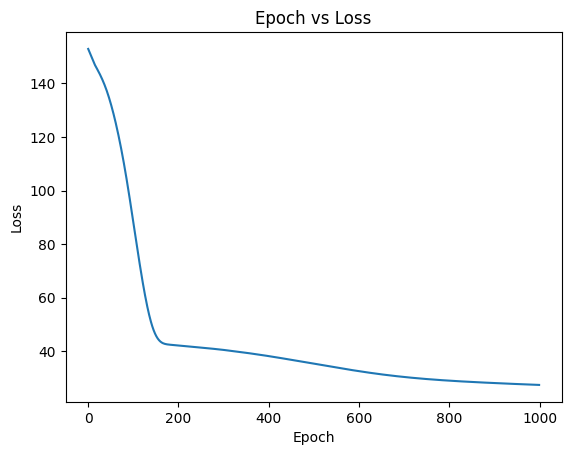



tensor([[16.6978],
        [ 2.1188],
        [ 6.8054],
        ...,
        [11.1447],
        [11.5319],
        [ 2.5507]], grad_fn=<AddmmBackward0>) torch.Size([1760, 1]) <class 'torch.Tensor'>


In [ ]:
num_epoch = 1000
losses = []
output = []

for epoch in range(num_epoch):
  output = crop_pred_1(X_train_tensor)
  loss = criterion(output, Y_train_tensor)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  losses.append(loss.item())

  if epoch % 100 == 0:
    print(f'Epoch: {epoch} \tLoss: {loss.item():.8f}')


plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.show()


print('\n')
print(output, output.shape, type(output))

#Running On Test Data

Epoch 0, Loss: 27.28532982
Epoch 100, Loss: 26.66865730
Epoch 200, Loss: 26.10648155
Epoch 300, Loss: 25.54785538
Epoch 400, Loss: 25.00152779
Epoch 500, Loss: 24.44857597
Epoch 600, Loss: 23.86322212
Epoch 700, Loss: 23.27748108
Epoch 800, Loss: 22.11874962
Epoch 900, Loss: 21.20860291


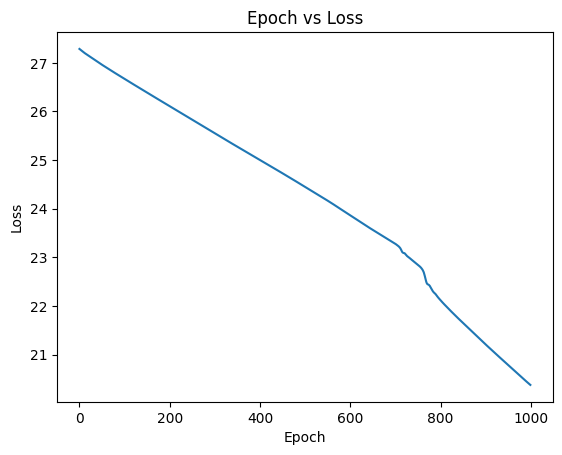

In [ ]:
num_epochs = 1000
losses = []

for epoch in range(num_epochs):
    outputs = crop_pred_1(X_test_tensor)

    loss = criterion(outputs, Y_test_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if epoch % 100 == 0:
      print(f'Epoch {epoch}, Loss: {loss.item():.8f}')

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.show()

In [ ]:
# crop_pred_1.eval()
# with torch.no_grad():
#     outputs = crop_pred_1(X_features_transformed_all_tensor)
#     loss = criterion(outputs, Y_label_encoded_tensor)
#     print(f'Test Loss: {loss.item()}')


#------------------------- Neural Network Implementing Classification Task ---------------------------

> RuntimeError: 0D or 1D target tensor expected, multi-target not supported

> Because of above error, modification of Y_label is required

In [ ]:
Y_train_squeezed = Y_train_tensor.squeeze()
print(Y_train_squeezed[0:10], Y_train_squeezed.shape, type(Y_train_squeezed), '\n')

Y_test_squeezed = Y_test_tensor.squeeze()
print(Y_test_squeezed[0:10], Y_test_squeezed.shape, type(Y_test_squeezed))

tensor([16.,  7.,  9., 13., 16.,  6.,  1., 16.,  7., 10.]) torch.Size([1760]) <class 'torch.Tensor'> 

tensor([16.,  1.,  6., 11., 16.,  3., 20.,  2.,  1., 16.]) torch.Size([440]) <class 'torch.Tensor'>


> **Error:** RuntimeError: expected scalar type Long but found Float

**Solution:**
LongTensor is synonymous with integer.
PyTorch won't accept a FloatTensor as categorical target, so you need to cast your tensor to LongTensor.

In [ ]:
#LongTensor is synonymous with integer.
#PyTorch won't accept a FloatTensor as categorical target, so you need to cast your tensor to LongTensor.
#This is how you should change your target dtype:

Y_train_squeezed = Y_train_squeezed.type(torch.LongTensor)
Y_test_squeezed = Y_test_squeezed.type(torch.LongTensor)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

print(X_train_transformed[0:1, :], X_train_transformed.shape, '\n')
print(X_test_transformed[0:1, :], X_test_transformed.shape)

[[-1.13250477 -1.38005203 -0.65552556 -2.22258918  1.0260618   0.12208362
   1.97667764]] (1760, 7) 

[[-0.28645372 -0.75740747 -0.74993581  1.13881305  0.90459738  0.10727709
   0.87761808]] (440, 7)


In [ ]:
X_train_tensor_features = torch.tensor(X_train_transformed, dtype=torch.float32)
print(X_train_tensor_features, X_train_tensor_features.shape, '\n')

X_test_tensor_features = torch.tensor(X_test_transformed, dtype=torch.float32)
print(X_test_tensor_features, X_test_tensor_features.shape)

tensor([[-1.1325, -1.3801, -0.6555,  ...,  1.0261,  0.1221,  1.9767],
        [-0.9428,  2.6024,  3.0568,  ...,  0.4249, -0.6856, -0.2335],
        [-0.5906,  0.4440, -0.4976,  ..., -2.3430,  0.2406, -0.8098],
        ...,
        [ 0.7913, -0.3160, -0.1026,  ...,  0.1291,  1.2583, -0.5691],
        [ 1.0080, -0.1032, -0.1619,  ...,  0.3796,  1.4333,  0.7646],
        [-1.2138,  2.6328,  3.0963,  ...,  0.5132, -0.6125, -0.1853]]) torch.Size([1760, 7]) 

tensor([[-0.2865, -0.7574, -0.7499,  ...,  0.9046,  0.1073,  0.8776],
        [ 1.0956,  0.9836,  0.0799,  ...,  0.4746,  0.2879, -0.9597],
        [ 1.9628, -0.3972, -0.6116,  ...,  0.4457, -0.4223,  0.4445],
        ...,
        [ 1.0956, -0.0970, -0.0782,  ...,  0.0923,  1.2409, -0.3509],
        [-0.3136,  2.6346,  2.9645,  ...,  0.3991, -0.5912, -1.0077],
        [-0.3136,  0.5634, -0.5326,  ..., -0.9930,  1.5143, -0.8157]]) torch.Size([440, 7])


In [ ]:
import torch
import torch.nn as nn

class CropPrediction(nn.Module):
    def __init__(self):
        super(CropPrediction, self).__init__()
        # Define the layers
        self.linear1 = nn.Linear(7, 25)
        self.linear2 = nn.Linear(25, 15)
        self.linear3 = nn.Linear(15, 22)

    def forward(self, x):
        # Define the forward pass
        x = torch.relu(self.linear1(x))
        x = torch.relu(self.linear2(x))
        x = self.linear3(x)
        return x


In [ ]:
crop_pred = CropPrediction()
crop_pred

CropPrediction(
  (linear1): Linear(in_features=7, out_features=25, bias=True)
  (linear2): Linear(in_features=25, out_features=15, bias=True)
  (linear3): Linear(in_features=15, out_features=22, bias=True)
)

In [ ]:
criterion_1 = nn.CrossEntropyLoss()
optimizer_1 = optim.Adam(crop_pred.parameters(), lr=0.001)

Epoch: 0 	Loss: 3.08996892
Epoch: 100 	Loss: 2.28849602
Epoch: 200 	Loss: 1.07441115
Epoch: 300 	Loss: 0.48880106
Epoch: 400 	Loss: 0.25458947
Epoch: 500 	Loss: 0.15786317
Epoch: 600 	Loss: 0.11185311
Epoch: 700 	Loss: 0.08609099
Epoch: 800 	Loss: 0.06954189
Epoch: 900 	Loss: 0.05787331


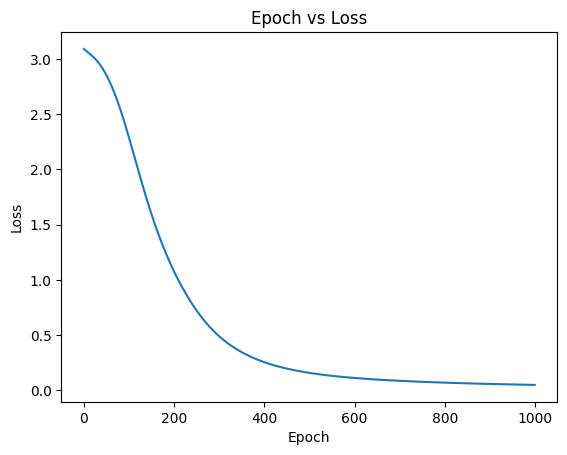

tensor([[-12.9580, -22.6100,  -9.8993,  ...,   6.4704,  -6.0489,   2.7519],
        [  8.9513,  -5.6320,   0.7065,  ...,   4.6813,  -8.2167, -10.4955],
        [-10.2907,  -8.2289,   0.9839,  ..., -10.3950,  -0.0693, -11.7163],
        ...,
        [ -7.6702,  -2.7961,  -0.4247,  ...,  -7.8592,   7.6351,  -4.7865],
        [ -6.7921,  -0.4492,   2.2053,  ...,  -9.6794,   7.1757,  -4.6163],
        [  9.6839,  -6.3206,   0.2329,  ...,   5.2126,  -8.2540, -11.2945]],
       grad_fn=<AddmmBackward0>) torch.Size([1760, 22])

tensor([16,  7,  9,  ...,  8,  8,  7]) torch.Size([1760])


In [ ]:
epochs = 1000
losses_1 = []
output_1 = []

for i in range(epochs):
  output_1 = crop_pred(X_train_tensor_features)
  loss_1 = criterion_1(output_1, Y_train_squeezed)
  optimizer_1.zero_grad()
  loss_1.backward()
  optimizer_1.step()

  losses_1 = np.append(losses_1, loss_1.detach().item())

  if i % 100 == 0:
    print(f"Epoch: {i} \tLoss: {loss_1.item():.8f}")

plt.plot(losses_1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.show()


print(output_1, output_1.shape)
print()
print(Y_train_squeezed, Y_train_squeezed.shape)

In [ ]:
predicted_class = torch.argmax(output_1, dim=1)

# Print the predicted class and actual class for comparison
print("Predicted class:", predicted_class[1200])
print("Actual class:", Y_train_squeezed[1200])

Predicted class: tensor(5)
Actual class: tensor(5)


Epoch: 0 	Loss: 0.09035023
Epoch: 100 	Loss: 0.04914433
Epoch: 200 	Loss: 0.03662523
Epoch: 300 	Loss: 0.02804810
Epoch: 400 	Loss: 0.02237118
Epoch: 500 	Loss: 0.01799068
Epoch: 600 	Loss: 0.01458587
Epoch: 700 	Loss: 0.01174735
Epoch: 800 	Loss: 0.00959047
Epoch: 900 	Loss: 0.00792723


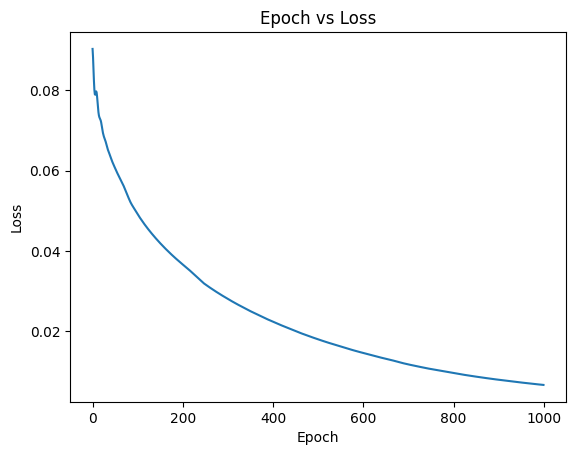

tensor([[ -6.6989, -10.5914,   1.0388,  ...,  -0.2646,  -8.5234, -11.2601],
        [ -0.5149,  16.8916,   6.4396,  ...,  -4.6313,  -8.2015,  -1.5253],
        [-19.6477,   1.9077,  -2.3458,  ...,  -5.4851,  -2.4658,  10.6177],
        ...,
        [-10.0670,   3.0925,   1.8638,  ...,  -9.4452,   8.1838,  -4.4318],
        [  7.9192,  -0.7089,   3.8690,  ...,   4.8513, -24.3398,  -6.9498],
        [ -9.0466,   3.1527,  13.0100,  ..., -17.3764,   1.1383, -16.9542]],
       grad_fn=<AddmmBackward0>) torch.Size([440, 22])

tensor([16,  1,  6, 11, 16,  3, 20,  2,  1, 16]) torch.Size([440])


In [ ]:
epochs = 1000
losses_2 = []
output_2 = []

for i in range(epochs):
  output_2 = crop_pred(X_test_tensor_features)
  loss_2 = criterion_1(output_2, Y_test_squeezed)
  optimizer_1.zero_grad()
  loss_2.backward()
  optimizer_1.step()

  losses_2 = np.append(losses_2, loss_2.detach().item())

  if i % 100 == 0:
    print(f"Epoch: {i} \tLoss: {loss_2.item():.8f}")

plt.plot(losses_2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.show()


print(output_2, output_2.shape)
print()
print(Y_test_squeezed[0:10], Y_test_squeezed.shape)

In [ ]:
predicted_class_test = torch.argmax(output_2, dim=1)

# Print the predicted class and actual class for comparison
print("Predicted class:", predicted_class_test[300])
print("Actual class:", Y_test_squeezed[300])

Predicted class: tensor(10)
Actual class: tensor(10)


#Classification Using Softmax

In [ ]:
import torch
import torch.nn as nn

class CropPrediction_softmax(nn.Module):
    def __init__(self):
        super(CropPrediction_softmax, self).__init__()
        # Define the layers
        self.linear1 = nn.Linear(7, 25)
        self.linear2 = nn.Linear(25, 15)
        self.linear3 = nn.Linear(15, 22)

    def forward(self, x):
        # Define the forward pass
        x = torch.relu(self.linear1(x))
        x = torch.relu(self.linear2(x))
        x = self.linear3(x)

        # Apply softmax to the output of the final linear layer
        x = torch.softmax(x, dim=1)

        return x


In [ ]:
softmax_pred = CropPrediction_softmax()
softmax_pred

CropPrediction_softmax(
  (linear1): Linear(in_features=7, out_features=25, bias=True)
  (linear2): Linear(in_features=25, out_features=15, bias=True)
  (linear3): Linear(in_features=15, out_features=22, bias=True)
)

In [ ]:
criterion_new = nn.CrossEntropyLoss()
optimizer_new = optim.Adam(crop_pred.parameters(), lr=0.001)

Epoch: 0 	Loss: 3.09084344
Epoch: 100 	Loss: 3.09084344
Epoch: 200 	Loss: 3.09084344
Epoch: 300 	Loss: 3.09084344
Epoch: 400 	Loss: 3.09084344
Epoch: 500 	Loss: 3.09084344
Epoch: 600 	Loss: 3.09084344
Epoch: 700 	Loss: 3.09084344
Epoch: 800 	Loss: 3.09084344
Epoch: 900 	Loss: 3.09084344


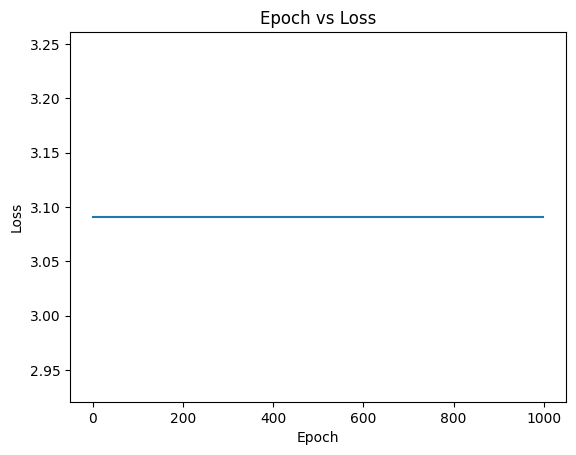

tensor([[0.0397, 0.0282, 0.0490,  ..., 0.0441, 0.0371, 0.0308],
        [0.0360, 0.0211, 0.0430,  ..., 0.0519, 0.0316, 0.0266],
        [0.0338, 0.0272, 0.0479,  ..., 0.0484, 0.0305, 0.0333],
        ...,
        [0.0356, 0.0320, 0.0508,  ..., 0.0519, 0.0339, 0.0372],
        [0.0359, 0.0337, 0.0500,  ..., 0.0500, 0.0345, 0.0372],
        [0.0358, 0.0207, 0.0431,  ..., 0.0517, 0.0318, 0.0265]],
       grad_fn=<SoftmaxBackward0>) torch.Size([1760, 22])

tensor([16,  7,  9, 13, 16,  6,  1, 16,  7, 10]) torch.Size([1760])


In [ ]:
epochs = 1000
losses_3 = []
output_3 = []

for i in range(epochs):
  output_3 = softmax_pred(X_train_tensor_features)
  loss_3 = criterion_new(output_3, Y_train_squeezed)
  optimizer_new.zero_grad()
  loss_3.backward()
  optimizer_new.step()

  losses_3 = np.append(losses_3, loss_3.detach().item())

  if i % 100 == 0:
    print(f"Epoch: {i} \tLoss: {loss_3.item():.8f}")

plt.plot(losses_3)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.show()


print(output_3, output_3.shape)
print()
print(Y_train_squeezed[0:10], Y_train_squeezed.shape)

In [ ]:
predicted_class_train = torch.argmax(output_3, dim=1)

# Print the predicted class and actual class for comparison
print("Predicted class:", predicted_class_train[1200])
print("Actual class:", Y_train_squeezed[1200])

Predicted class: tensor(7)
Actual class: tensor(5)


In [ ]:
# for i in range(epochs):
#     output_3 = softmax_pred(X_train_tensor_features)
#     loss_3 = criterion_new(output_3, Y_train_squeezed)
#     optimizer_new.zero_grad()
#     loss_3.backward()

#     # Debugging: Check gradients of the first layer
#     print(f"Epoch {i}: Gradient of linear1: {softmax_pred.linear1.weight.grad}")

#     optimizer_new.step()

#     losses_3 = np.append(losses_3, loss_3.detach().item())

#     if i % 100 == 0:
#         print(f"Epoch: {i} \tLoss: {loss_3.item():.8f}")


#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy")

In [ ]:
clf.fit(X_train_tensor_features, Y_train_squeezed)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Make predictions
y_pred = clf.predict(X_test_tensor_features)

In [ ]:
accuracy = accuracy_score(Y_test_squeezed, y_pred)

In [ ]:
print("Accuracy:", accuracy)

Accuracy: 0.9818181818181818
